In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Loading data and descriptive statistics

In [3]:
df_red = pd.read_csv('http://mlr.cs.umass.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=";")

In [4]:
df_red.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


Assignment

In [5]:
y = (df_red['quality'].values > 6)
X = df_red.iloc[:,0:11]

Train-Test split

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, random_state=0)

Preprocessing data - standardizing

In [7]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)
pd.DataFrame(X_train_std).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
0,1119.0,-1.271945e-16,1.000447,-2.090941,-0.712549,-0.253085,0.550977,4.341555
1,1119.0,-1.214399e-16,1.000447,-2.214153,-0.757544,-0.056214,0.591167,5.662322
2,1119.0,-2.622765e-16,1.000447,-1.396757,-0.934734,-0.062025,0.759348,3.736827
3,1119.0,2.115277e-16,1.000447,-1.108115,-0.438669,-0.237836,0.029943,8.665794
4,1119.0,-1.587450e-18,1.000447,-1.527181,-0.356857,-0.175255,0.046703,10.559442
5,1119.0,1.438627e-16,1.000447,-1.419711,-0.767974,-0.209341,0.535501,5.190770
6,1119.0,1.230274e-17,1.000447,-1.210217,-0.743039,-0.275861,0.454105,7.052999
7,1119.0,-5.975193e-14,1.000447,-3.520329,-0.608117,-0.018302,0.582045,3.652243
8,1119.0,1.005551e-15,1.000447,-3.669365,-0.638236,0.006686,0.587115,4.521134
9,1119.0,-3.551920e-17,1.000447,-1.626274,-0.618757,-0.226944,0.388761,7.497358


Logistic Regression with PCA

In [8]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('pca', PCA(n_components=2)),
                    ('clf', LogisticRegression(random_state=1))])

pipe_lr.fit(X_train, y_train)
print('Test Accuracy: %.3f' % pipe_lr.score(X_test, y_test))
y_pred = pipe_lr.predict(X_test)

Test Accuracy: 0.892


Plot- confusion matrix

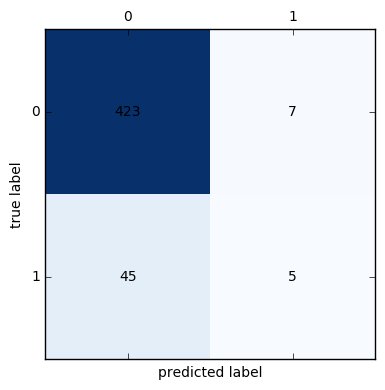

In [9]:
from sklearn.metrics import confusion_matrix

def CM(output):
    fig, ax = plt.subplots(figsize=(4, 4))
    ax.matshow(output, cmap=plt.cm.Blues)
    for i in range(output.shape[0]):
        for j in range(output.shape[1]):
            ax.text(x=j, y=i, s=output[i, j], va='center', ha='center')

    plt.xlabel('predicted label')
    plt.ylabel('true label')

    plt.tight_layout()
    plt.show()

output1 = confusion_matrix(y_true=y_test, y_pred=y_pred)
CM(output1)

In [10]:
def ERR(x):
    result=np.matrix(x)
    y=(result[0,1]+result[1,0])/(result[0,0]+result[0,1]+result[1,0]+result[1,1])
    return y

ERR(output1)

0.10833333333333334

SVM with Radial basis

Test Accuracy: 0.894


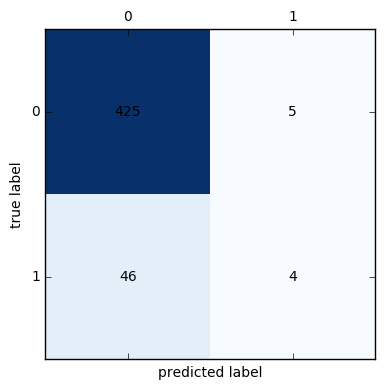

0.10625

In [11]:
from sklearn.svm import SVC

pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('pca', PCA(n_components=2)),
                    ('svm', SVC(kernel='rbf', random_state=0, gamma=0.20, C=5.0))])

pipe_lr.fit(X_train, y_train)
print('Test Accuracy: %.3f' % pipe_lr.score(X_test, y_test))
y_pred = pipe_lr.predict(X_test)

pca= PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

#confusion matrix#
output2 = confusion_matrix(y_true=y_test, y_pred=y_pred)
CM(output2)
ERR(output2)

Linear regression

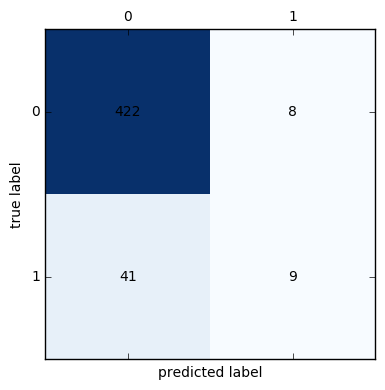

0.10208333333333333

In [12]:
import sklearn.linear_model as skl_lm
regr=skl_lm.LinearRegression()
regr.fit(X_train,y_train)
y_pred =regr.predict(X_test)
y_pred=pd.DataFrame(y_pred)
y_pred=(abs(y_pred.values)>0.5)

#confusion matrix#
output3 = confusion_matrix(y_true=y_test, y_pred=y_pred)
CM(output3)
ERR(output3)